In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('CarPrice_Assignment.csv')
df = pd.get_dummies(df, drop_first=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
x = df.drop("price", axis=1)
y = df["price"]
x = x.astype(float)

In [24]:
x = x.fillna(x.mean())
y = y.fillna(y.mean())

m = len(df)
split_index = int(0.8 * m)

In [25]:
x_train = x.iloc[:split_index].values
y_train = y.iloc[:split_index].values

x_test = x.iloc[split_index:].values
y_test = y.iloc[split_index:].values

In [26]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
sigma[sigma == 0] = 1
x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma


In [27]:
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1 / m) * np.dot(x.T, (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iters):
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost_history.append(compute_cost(x, y, w, b))
    return w, b, cost_history


In [28]:
n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0
alpha = 0.01
iters = 700

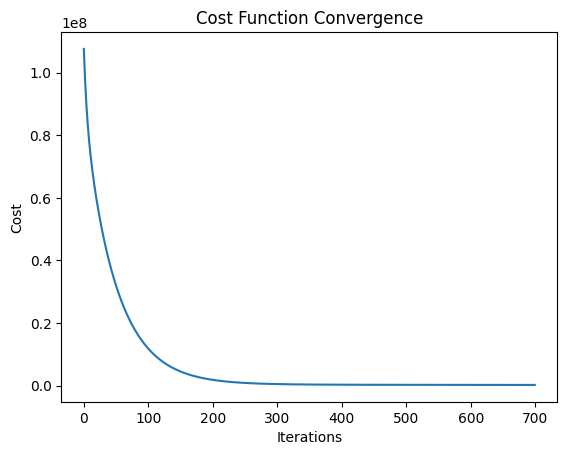

In [29]:
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iters)

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [30]:
train_predictions = predict(x_train, w_final, b_final)
test_predictions = predict(x_test, w_final, b_final)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

Train RMSE: 697.8412987909297
Test RMSE: 4060.585650013438
Train R²: 0.9918221595875436
Test R²: 0.7873645359494629


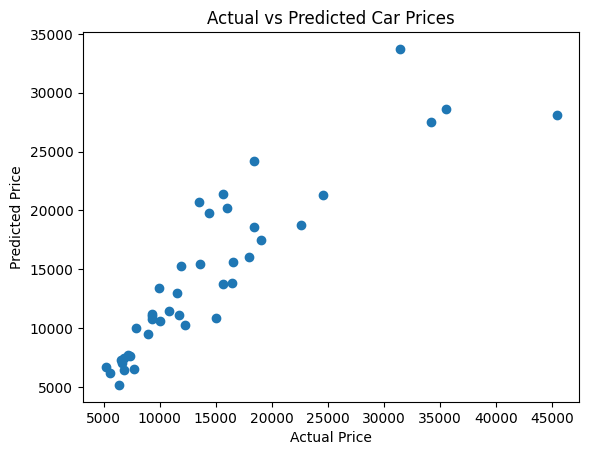


Weights:
 [-4.93302205e+02 -2.46548233e+01  3.24319967e+02  2.83609472e+02
  8.52715049e+02  8.67627842e+01  8.53046752e+02  1.02103686e+03
  3.08296961e+02 -2.42468154e+02  5.74557066e+01  9.97642350e+02
  3.23356650e+02 -2.82301033e+02 -2.22583255e+02 -1.86088874e+02
 -3.25180203e+01  0.00000000e+00  7.72123997e+01 -2.17104983e+02
  1.42132439e+02 -2.13115368e+01 -1.68142818e+02 -1.28112167e+02
  1.87719320e+02  1.37381747e+02  5.54675929e+02  3.97551236e+02
  1.18490624e+03  0.00000000e+00  4.48364476e+02  3.73908712e+02
  7.70180239e+02  8.51844561e+01  0.00000000e+00  0.00000000e+00
  4.36731303e+02  8.21259381e+02  1.20506549e+02  6.58328208e+00
  0.00000000e+00 -1.39909518e+01  1.34808763e+00 -7.06342491e+01
 -1.30637851e+02 -6.89998471e+01 -1.22327203e+02 -1.23194114e+02
 -5.43268659e+01  0.00000000e+00  1.67600510e+01 -6.46477122e+01
 -1.25273587e+02  1.38747897e+02 -3.90622950e+01 -6.32650043e+01
 -8.26322224e+00  1.37940669e+01 -1.70198239e+02  2.18625659e+02
  1.52847869e+

In [31]:
print("Train RMSE:", rmse(y_train, train_predictions))
print("Test RMSE:", rmse(y_test, test_predictions))

print("Train R²:", r2_score(y_train, train_predictions))
print("Test R²:", r2_score(y_test, test_predictions))


plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

print("\nWeights:\n", w_final)
print("\nBias:\n", b_final)